### Урок 2. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [7]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=33)
model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
# y_pred = model_ridge.predict(X_valid)
# y_pred_train = model_ridge.predict(X_train)
# print("Качество на валидации (ridge): %.3f" % mean_squared_error(y_valid, y_pred))
# print("Качество на обучении (ridge): %.3f" % mean_squared_error(y_train, y_pred_train))

model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)
# y_pred = model_lasso.predict(X_valid)
# y_pred_train = model_lasso.predict(X_train)
# print("Качество на валидации (lasso): %.3f" % mean_absolute_error(y_valid, y_pred))
# print("Качество на обучении (lasso): %.3f" % mean_absolute_error(y_train, y_pred_train))

G:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.213089995661913, tolerance: 0.0024304858219796367
  positive)


<BarContainer object of 8 artists>

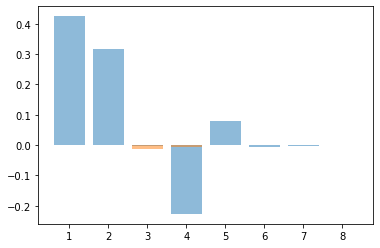

In [14]:
from matplotlib import pyplot as plt
plt.bar(range(1, degree + 1), model_ridge.coef_, alpha=0.5)
plt.bar(range(1, degree + 1), model_lasso.coef_, alpha=0.5)

<BarContainer object of 8 artists>

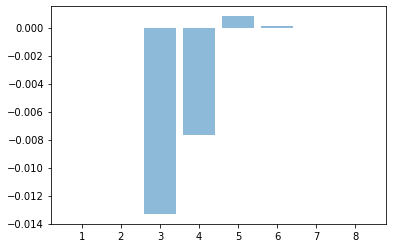

In [15]:
# соотношение коэффициентов в лассо на общем графике почти не видно, так как они значительно меньше, чем в ridge
plt.bar(range(1, degree + 1), model_lasso.coef_, alpha=0.5)

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!